In [1]:
%pylab inline
%config InlineBackend.figure_format = 'retina'
from utils import *

Populating the interactive namespace from numpy and matplotlib


This notebook focus on three jumper tasks for all three rats.

# visualize all trials

In [ ]:
trials = torch.load('./data/Jumper/jumper_trials.pt')

In [170]:
# select which rat
# rat1: wr112, rat2: wr118, rat3: wr121
rat_name = 'wr121'

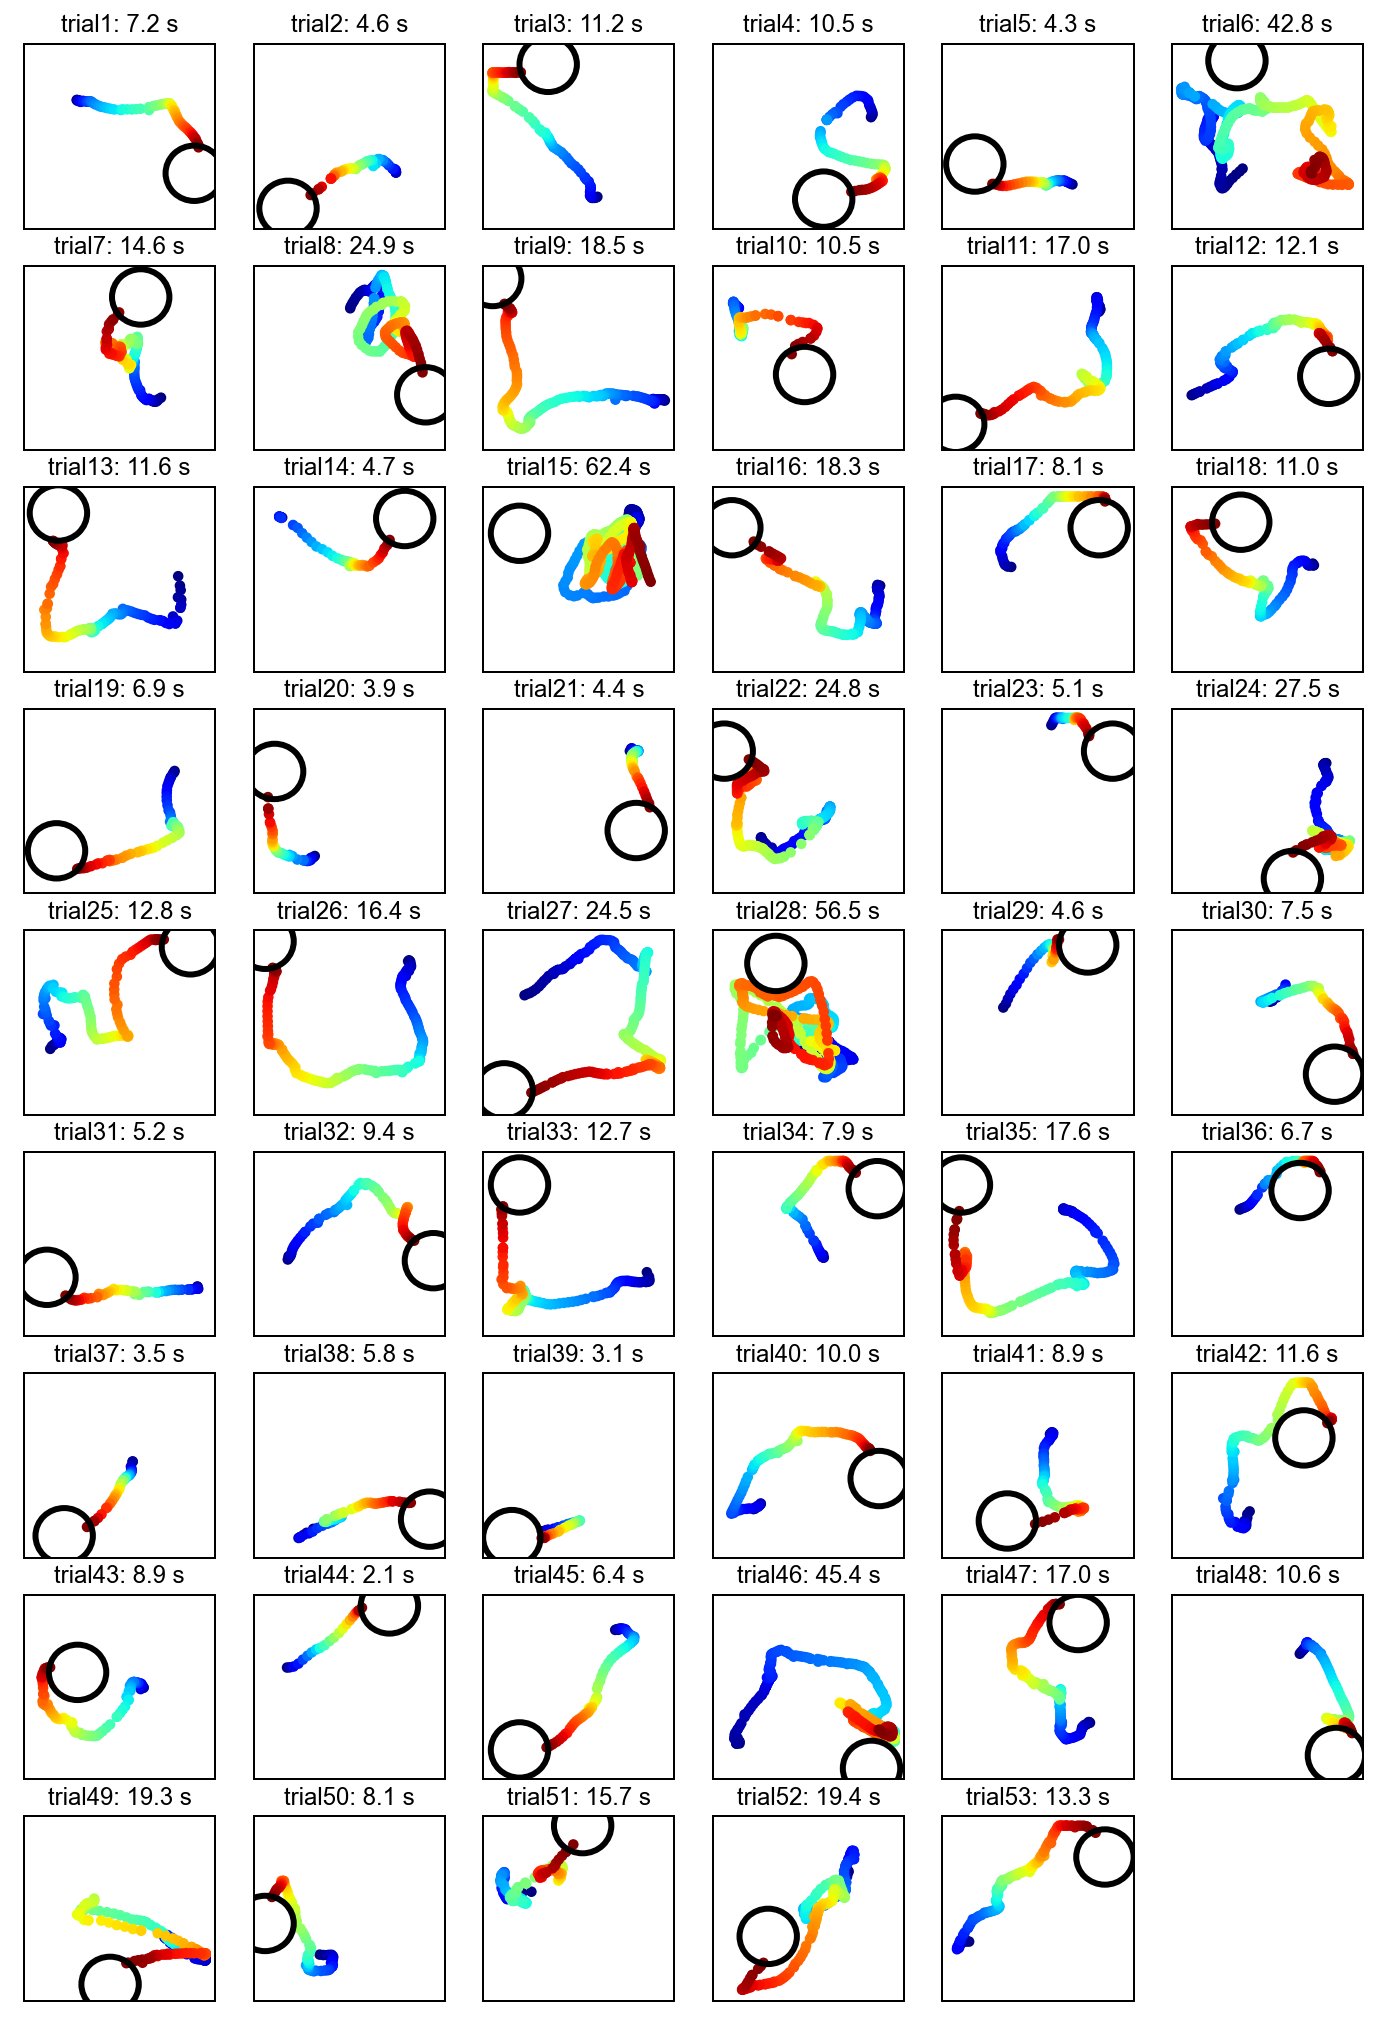

In [171]:
# plot all trials of the slected rat
N = 6
# plot all trials in a grid with each row containing N trials
n_trials = len(trials[rat_name])
n_rows, n_cols = n_trials//N+1, N
fig, ax = plt.subplots(n_rows, n_cols, figsize=(n_cols*2,n_rows*2))
for k in range(n_trials):

    _goal_pos = trials[rat_name][k]['goal_pos']
    _bmi_t, _bmi_pos  = trials[rat_name][k]['bmi_t'], trials[rat_name][k]['bmi_pos']

    a, b = int(k//N), int(k%N)
    plot_trial(_bmi_t, _bmi_pos, _goal_pos, ax=ax[a, b], markersize=20)
    
    _trial_time_spent = _bmi_t[-1]-_bmi_t[0]
    ax[a, b].set_title(f'trial{k+1}: {_trial_time_spent:.1f} s', fontsize=12)
    
    ax[a, b].set_xlim([-50, 50]);
    ax[a, b].set_ylim([-50, 50]);
    ax[a, b].axes.xaxis.set_visible(False)
    ax[a, b].axes.yaxis.set_visible(False)

# make sure that the ax[a,b] that is not used is hidden
for k in range(n_trials, n_rows*n_cols):
    a, b = int(k//N), int(k%N)
    ax[a, b].set_visible(False)

# goal-directness in Jumper

In [53]:
# quantify the goal-directness using angles between movement directions and direction to goal centers
total_angles1 = get_total_angles(trials, 'wr112')
total_angles2 = get_total_angles(trials, 'wr118')
total_angles3 = get_total_angles(trials, 'wr121')

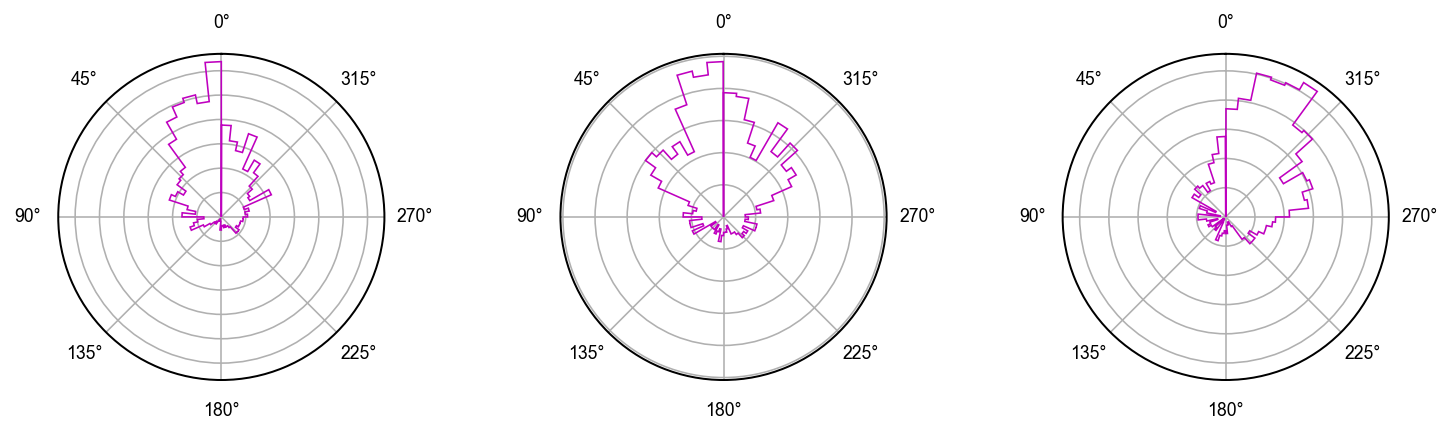

In [54]:
fig, ax = plt.subplots(1, 3, figsize=(12, 3), subplot_kw=dict(projection='polar'))

ax[0].hist(total_angles1, bins=60, density=True, color='m', alpha=1, edgecolor='m', histtype='step');
ax[1].hist(total_angles2, bins=60, density=True, color='m', alpha=1, edgecolor='m', histtype='step');
ax[2].hist(total_angles3, bins=60, density=True, color='m', alpha=1, edgecolor='m', histtype='step');

for i in range(3):
    ax[i].set_yticklabels([])
    ax[i].set_rlabel_position(90)
    ax[i].set_theta_zero_location("N")
    
plt.subplots_adjust(wspace=0.5, hspace=0.3)

# ball movement in jumper

In [55]:
# calculate mean speed of all trials, each trial has a mean speed
mean_speed_112 = np.zeros(len(trials['wr112']))
for trial_no in range(len(trials['wr112'])):
    mean_speed_112[trial_no] = trials['wr112'][trial_no]['bv'][1:].mean()

mean_speed_118 = np.zeros(len(trials['wr118']))
for trial_no in range(len(trials['wr118'])):
    mean_speed_118[trial_no] = trials['wr118'][trial_no]['bv'][1:].mean()

mean_speed_121 = np.zeros(len(trials['wr121']))
for trial_no in range(len(trials['wr121'])):
    mean_speed_121[trial_no] = trials['wr121'][trial_no]['bv'][1:].mean()


In [56]:
# calculate correlation value and p value for wr112, with nan in mean_speed_112
from scipy.stats import pearsonr
corr_112, p_112 = pearsonr(mean_speed_112, np.arange(len(mean_speed_112)))
corr_118, p_118 = pearsonr(mean_speed_118, np.arange(len(mean_speed_118)))
corr_121, p_121 = pearsonr(mean_speed_121, np.arange(len(mean_speed_121)))

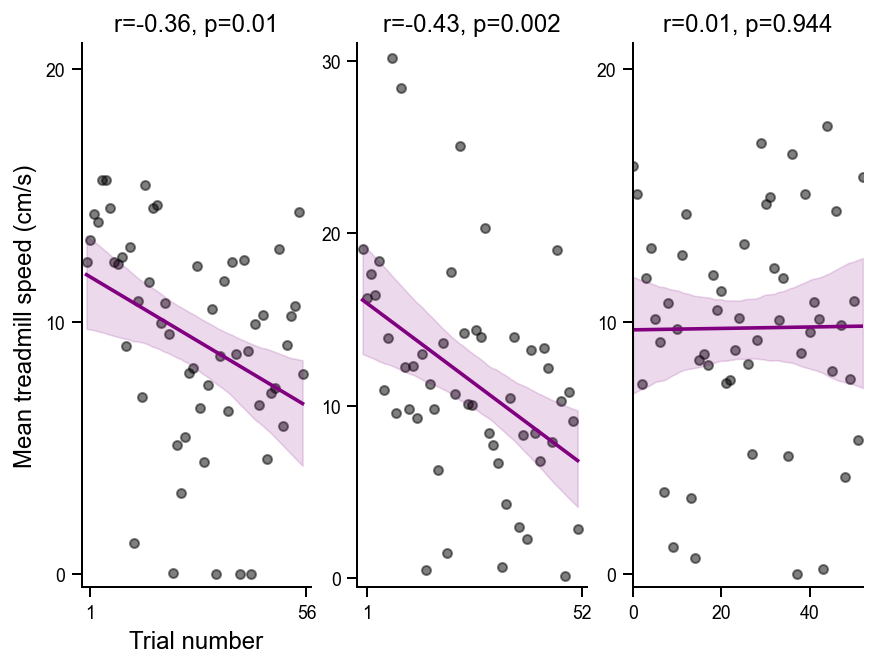

In [57]:
# use seaborn regplot to plot linear regression and scatter plot of mean speed vs trial number, for each animal
fig, ax = plt.subplots(1,3,figsize=(2*3+1, 5))

# wr112: ax[0]
# remove right and upper spines
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
sns.regplot(x=np.arange(len(mean_speed_112)), y=mean_speed_112, ax=ax[0],
            color='k', scatter_kws={'s': 20, 'alpha': 0.5})

# x axis should be just 1 and max trial number
ax[0].set_xticks([1, len(mean_speed_112)]);
ax[0].set_xlim([-1.25, len(mean_speed_112)+1.25]);

# calculate the correlation value and p value, make its title, calcualte with nan
ax[0].set_title(f'r={corr_112:.2f}, p={p_112:.2f}', fontsize=12)

# wr118: ax[1]
# remove right and upper spines
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
sns.regplot(x=np.arange(len(mean_speed_118)), y=mean_speed_118, ax=ax[1],
            color='k', scatter_kws={'s': 20, 'alpha': 0.5})

# x axis should be just 1 and max trial number
ax[1].set_xticks([1, len(mean_speed_118)]);
ax[1].set_xlim([-1.25, len(mean_speed_118)+1.25]);

# calculate the correlation value and p value, make its title
ax[1].set_title(f'r={corr_118:.2f}, p={p_118:.3f}', fontsize=12);

# wr121: ax[2]
# remove right and upper spines
ax[2].spines['right'].set_visible(False)
ax[2].spines['top'].set_visible(False)
sns.regplot(x=np.arange(len(mean_speed_121)), y=mean_speed_121, ax=ax[2],
            color='k', scatter_kws={'s': 20, 'alpha': 0.5})

# x axis should be just 1 and max trial number
# ax[2].set_xticks([1, len(mean_speed)]);
# ax[2].set_xlim([-1.25, len(mean_speed)+1.25]);

# calculate the correlation value and p value, make its title
ax[2].set_title(f'r={corr_121:.2f}, p={p_121:.3f}', fontsize=12);

# set y axis label
ax[0].set_ylabel('Mean speed (cm/s)', fontsize=12);

# change the fitting line and 95 CI to purple for all axis, but keep scatter dots black
for i in range(3):
    ax[i].lines[0].set_color('purple')
    ax[i].collections[1].set_color('purple')

# axis 0 and 2 y axis range from 0 to 20, axis 1 y axis range from 0 to 30
ax[0].set_ylim([-0.5, 21]);
ax[1].set_ylim([-0.5, 31]);
ax[2].set_ylim([-0.5, 21]);

# ax0 y ticks only 0 , 10, 20, ax1 y ticks only 0, 10, 20, 30, ax2 y ticks only 0, 10, 20
ax[0].set_yticks([0, 10, 20]);
ax[1].set_yticks([0, 10, 20, 30]);
ax[2].set_yticks([0, 10, 20]);

# ax x axis label: trial number
ax[0].set_xlabel('Trial number', fontsize=12);
ax[0].set_ylabel('Mean treadmill speed (cm/s)', fontsize=12);

In [201]:
# Non movement trials show that animal doesn't need to move to make jumper task work 
# wr112: 12, 22, 33, 39, 42
# wr118: 15, 48
# wr121: 9, 37, 43, (21: this trial is particularly interesting, animal moves a lot but bmi position is not changing, it stops moving then bmi position moves towards goal)

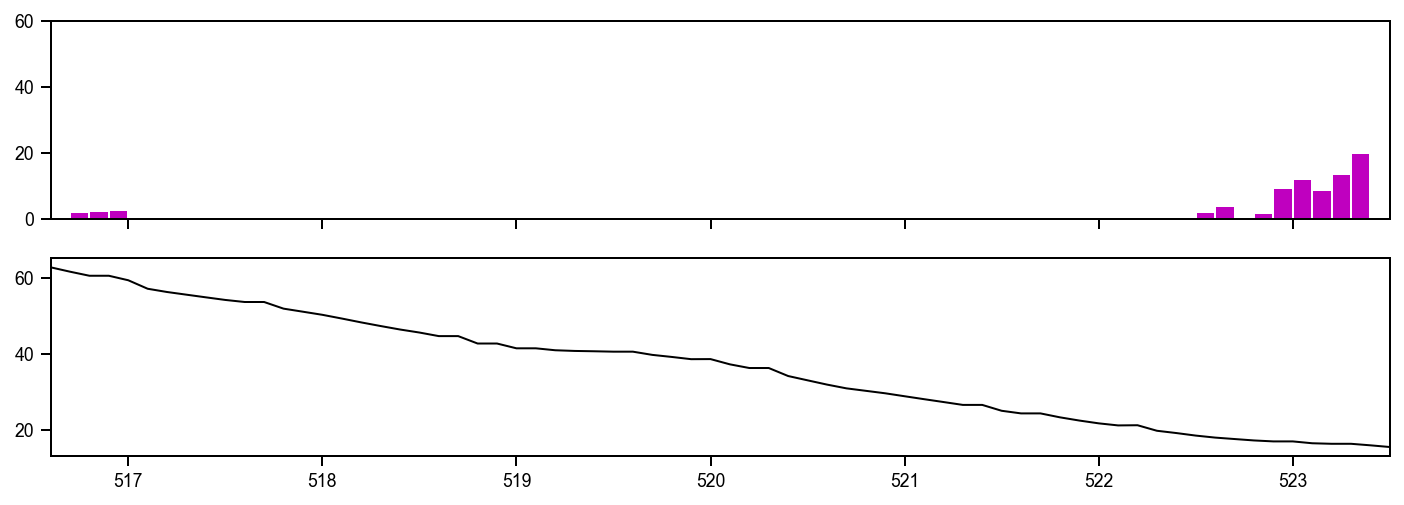

In [204]:
fig, ax = plt.subplots(2, 1, figsize=(12, 4), sharex=True)
rat_name = 'wr112'
i = 12
ax[0].bar(trials[rat_name][i]['bmi_t'], trials[rat_name][i]['bv'], width=0.1, align='edge', alpha=1, label='Speed estimation', color='m', edgecolor='w', lw=1);
ax[0].set_xlim(trials[rat_name][i]['bmi_t'][0], trials[rat_name][i]['bmi_t'][-1]);
ax[0].set_ylim(0, 60);
ax[1].plot(trials[rat_name][i]['bmi_t'], trials[rat_name][i]['goal_dist'], color='k', lw=1, label='distance to goal');

# validate that the animal position in each trial is the same as stored animal position

if you understand this, you can then redecode the neural data (check `pretrained_dnn_decode_offline_xxxx.ipynb`) and insert offline decoded (optionally smoothed) result into each trial according to the time stamps.

key is that the PV time stamps (`pv_t`) use the same time frame as the time stamps in each trial (`trials[rat_name][trial_no]['bmi_t']`).

We used two assertions to validate each rat

In [210]:
rat_name = 'wr112'
B_bins = 50
pv_t = np.load('./data/Jumper/wr112_0905_Jumper_PV_t.npy')[B_bins-1:]
ani_pos = np.load('./data/Jumper/wr112_0905_Jumper_ani_pos.npy')
assert(len(pv_t) == len(ani_pos))

for i in range(len(trials[rat_name])):
    # get the bmi_t and bmi_pos from individual trials
    bmi_t = trials[rat_name][i]['bmi_t']
    bmi_pos = trials[rat_name][i]['bmi_pos']

    # find the index of pv_t that is closest to bmi_t (trial time), and use that index to get the corresponding ani_pos
    # then assert that the ani_pos (of the related pv time) is the same as bmi_pos (of the related bmi time in trial)
    idx = np.searchsorted(pv_t, bmi_t) - 1
    _bmi_pos = ani_pos[idx]

    assert(np.allclose(_bmi_pos, bmi_pos))

In [211]:
rat_name = 'wr118'
B_bins = 50
pv_t = np.load('./data/Jumper/wr118_0821_Jumper_PV_t.npy')[B_bins-1:]
ani_pos = np.load('./data/Jumper/wr118_0821_Jumper_ani_pos.npy')
assert(len(pv_t) == len(ani_pos))

for i in range(len(trials[rat_name])):
    bmi_t = trials[rat_name][i]['bmi_t']
    bmi_pos = trials[rat_name][i]['bmi_pos']

    # find the index of pv_t that is closest to bmi_t (trial time), and use that index to get the corresponding ani_pos
    # then assert that the ani_pos (of the related pv time) is the same as bmi_pos (of the related bmi time in trial)
    idx = np.searchsorted(pv_t, bmi_t) - 1
    _bmi_pos = ani_pos[idx]

    assert(np.allclose(_bmi_pos, bmi_pos))


In [212]:
rat_name = 'wr121'
B_bins = 15
pv_t = np.load('./data/Jumper/wr121_0927_Jumper_PV_t.npy')[B_bins-1:]
ani_pos = np.load('./data/Jumper/wr121_0927_Jumper_ani_pos.npy')
assert(len(pv_t) == len(ani_pos))

for i in range(len(trials[rat_name])):
    bmi_t = trials[rat_name][i]['bmi_t']
    bmi_pos = trials[rat_name][i]['bmi_pos']

    # find the index of pv_t that is closest to bmi_t (trial time), and use that index to get the corresponding ani_pos
    # then assert that the ani_pos (of the related pv time) is the same as bmi_pos (of the related bmi time in trial)
    idx = np.searchsorted(pv_t, bmi_t) - 1
    _bmi_pos = ani_pos[idx]

    assert(np.allclose(_bmi_pos, bmi_pos))